# Analysis of Top 2000 spotify songs
we need to pick a real-world dataset of our choice and apply the concepts learned in this course to perform exploratory data analysis. I picked a dataset of Health insurance cross sell prediction from the website named kaggle. we need to create a Dataset which must contain at least 3 columns and 150 rows of data ,must ask and answer at least 4 questions about the dataset and our submission must include at least 4 visualizations (graphs).must include explanations using markdown cells, apart from the code.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

we need to download the dataset of our wish

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bhukyasravani
Your Kaggle Key: ········


100%|██████████| 65.5k/65.5k [00:00<00:00, 41.5MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './spotify-top-2000s-mega-dataset'

In [5]:
import os
os.listdir(data_dir)

['Spotify-2000.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "/spotify-top-2000s-mega-dataset" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "ch20b024/spotify-top-2000s-mega-dataset"
[jovian] Committed successfully! https://jovian.ai/ch20b024/spotify-top-2000s-mega-dataset-2d59b


'https://jovian.ai/ch20b024/spotify-top-2000s-mega-dataset-2d59b'

## Data Preparation and Cleaning

- Here we have downloaded the dataset of top hits of spotify 2000-2019 from kaggle



In [10]:
import pandas as pd

In [11]:
spotify_raw_df = pd.read_csv(data_dir + "/Spotify-2000.csv")

In [12]:
spotify_raw_df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


Now lets explore the dataset 

In [13]:
spotify_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [14]:
spotify_raw_df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [15]:
spotify_raw_df.columns


Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
       'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')

In [16]:
spotify_raw_df.shape

(1994, 15)

In [17]:
import jovian

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ch20b024/spotify-top-2000s-mega-dataset-2d59b" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ch20b024/spotify-top-2000s-mega-dataset-2d59b


'https://jovian.ai/ch20b024/spotify-top-2000s-mega-dataset-2d59b'

## Exploratory Analysis and Visualization

Plotting graphs based on the various attributes given in the datafile



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

The liveness in songs of each artists through the years

In [20]:
spotify_raw_df


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


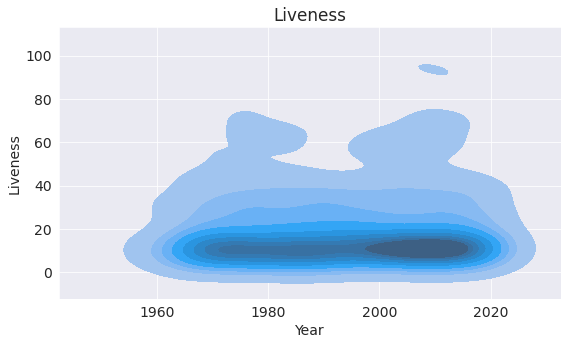

In [21]:
plt.title("Liveness")

sns.kdeplot(spotify_raw_df.Year, spotify_raw_df.Liveness, shade=True, shade_lowest=False);

Energy & Danceability of Songs in 2000

In [22]:
Year2000 = spotify_raw_df[spotify_raw_df.Year == 2000]

In [23]:
Year2000

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
12,13,Als Het Golft,De Dijk,dutch indie,2000,102,88,54,-6,53,59,214,2,3,34
51,52,Dansen Aan Zee,BLØF,dutch pop,2000,194,43,35,-11,10,26,275,16,3,52
61,62,Solitary Man,Johnny Cash,arkansas country,2000,86,56,44,-7,25,70,144,35,3,47
64,65,Kryptonite,3 Doors Down,alternative metal,2000,99,87,55,-6,17,54,234,1,3,77
82,83,Only Time,Enya,celtic,2000,83,25,42,-14,11,21,219,84,3,70
100,101,In the End,Linkin Park,alternative metal,2000,105,86,56,-6,21,40,217,1,6,83
141,142,She Sells Sanctuary,The Cult,album rock,2000,139,77,55,-9,13,42,253,0,3,63
143,144,Red Red Wine,UB40,reggae fusion,2000,89,47,86,-9,27,84,184,0,5,74
148,149,I Want To Hold Your Hand - Remastered 2015,The Beatles,british invasion,2000,131,72,49,-6,31,87,146,39,5,75


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Energy & Danceability of Songs in 2000'}, xlabel='Energy', ylabel='Danceability'>

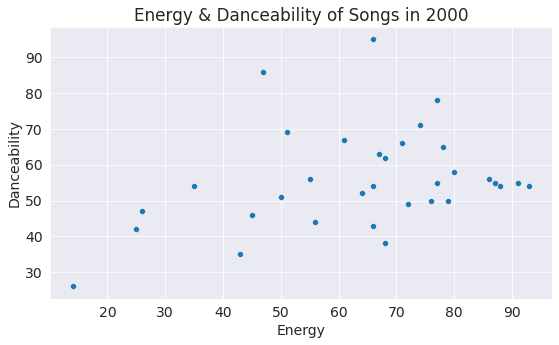

In [24]:
plt.title("Energy & Danceability of Songs in 2000")

sns.scatterplot(Year2000.Energy,Year2000.Danceability)

Popularity in 1990

In [25]:
Year1990 = spotify_raw_df[spotify_raw_df.Year == 1990]
Year1990

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1496,1497,Thunderstruck,AC/DC,album rock,1990,134,89,50,-5,22,26,293,0,4,81
1497,1498,Papa,Stef Bos,christelijk,1990,120,32,74,-13,8,29,193,72,3,57
1498,1499,Enjoy the Silence - Single Mix,Depeche Mode,dance rock,1990,113,81,64,-8,8,82,257,16,3,65
1499,1500,Still Got The Blues,Gary Moore,album rock,1990,170,39,19,-14,12,32,371,26,4,65
1500,1501,Wind Of Change,Scorpions,album rock,1990,152,52,45,-10,10,25,312,32,4,77
1501,1502,Nothing Compares 2 U,Sinéad O'Connor,folk,1990,120,57,51,-7,11,16,280,4,3,71
1502,1503,Silent Lucidity - Remastered/2003,Queensrÿche,album rock,1990,140,63,46,-6,12,10,348,5,3,61
1503,1504,Such a Shame,Talk Talk,art rock,1990,112,68,60,-11,30,71,258,21,3,57
1504,1505,Hunger Strike,Temple Of The Dog,alternative metal,1990,138,57,37,-11,9,30,246,2,3,59
1505,1506,Candy,Iggy Pop,alternative rock,1990,144,59,62,-11,5,65,253,4,3,60


Finding the most popular genre and plotting it bar graph

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


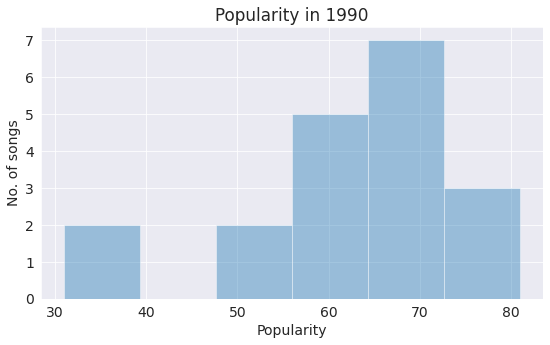

In [26]:
plt.title("Popularity in 1990")
plt.ylabel("No. of songs")
sns.distplot(Year1990.Popularity, kde=False);

Comparing the acousticness of songs in 2000

In [27]:
Year2000.Acousticness

1      17
12      2
51     16
61     35
64      1
82     84
100     1
141     0
143     0
148    39
176     0
192     3
193    39
202    41
219     4
232     0
233    82
239     0
259    32
267    63
274    26
307    14
308    87
313     6
325     1
329    64
335    35
349     3
358    16
371    61
375     0
376    19
379    14
Name: Acousticness, dtype: int64

Text(0, 0.5, 'Acousticness')

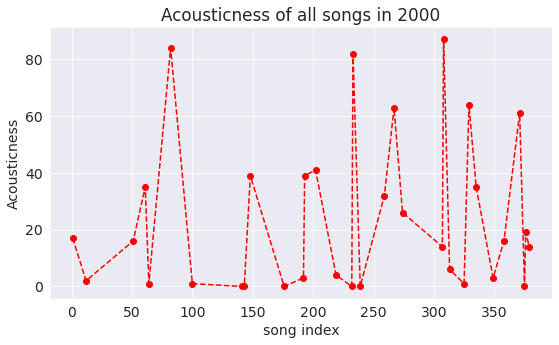

In [28]:
plt.title("Acousticness of all songs in 2000")
plt.plot(Year2000.Acousticness,'o--r');
plt.xlabel('song index')
plt.ylabel("Acousticness")

Speechiness of songs on 1990

In [29]:
Year1990.Speechiness

1496    4
1497    3
1498    3
1499    4
1500    4
1501    3
1502    3
1503    3
1504    3
1505    3
1506    3
1507    4
1508    3
1509    3
1510    3
1511    4
1512    3
1513    9
1514    4
Name: Speechiness, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


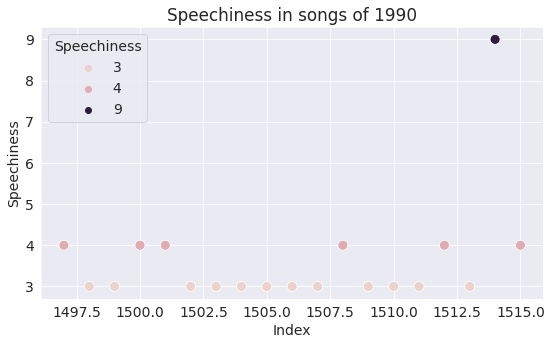

In [30]:
plt.title("Speechiness in songs of 1990")
#sns.heatmap(Year1990.Speechiness, fmt="d", annot=True, cmap='Blues')

sns.scatterplot( Year1990.Index, # X-axis
                Year1990.Speechiness,  # Y-axis
                hue=Year1990.Speechiness,  # Dot color
                s=100);

Let us save and upload our work to Jovian before continuing

In [31]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ch20b024/spotify-top-2000s-mega-dataset-2d59b" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ch20b024/spotify-top-2000s-mega-dataset-2d59b


'https://jovian.ai/ch20b024/spotify-top-2000s-mega-dataset-2d59b'

## Asking and Answering Questions
Questions related to the data are shown below and datafile has be analysed and worked upon according to tests give



Q1: which songs of 2000 have popularity more that 90

In [33]:
spotify_raw_df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [34]:
Pop2000 = Year2000[Year2000.Popularity>70]

In [35]:
Pop2000.Title

64                                     Kryptonite
100                                    In the End
143                                  Red Red Wine
148    I Want To Hold Your Hand - Remastered 2015
192                           The Real Slim Shady
219                                          Stan
239                                        Yellow
267                      (What A) Wonderful World
349                                  It's My Life
358                   When You Say Nothing At All
376                                       Trouble
Name: Title, dtype: object

Q2: Which song among the top 2000 fall amoung the top danceable songs ( >90)

In [36]:
DanceTop = spotify_raw_df[spotify_raw_df.Danceability>90]

In [37]:
DanceTop

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
9,10,Without Me,Eminem,detroit hip hop,2002,112,67,91,-3,24,66,290,0,7,82
27,28,Cleanin' Out My Closet,Eminem,detroit hip hop,2002,148,76,91,-5,8,87,298,7,17,71
192,193,The Real Slim Shady,Eminem,detroit hip hop,2000,105,66,95,-4,5,76,284,3,6,80
216,217,Pa,Doe Maar,dutch cabaret,2008,129,59,93,-12,11,96,219,43,5,41
282,283,Watskeburt?!,De Jeugd Van Tegenwoordig,dutch hip hop,2008,130,49,95,-8,23,59,376,1,23,55
714,715,Rapper's Delight,The Sugarhill Gang,east coast hip hop,2017,112,75,91,-10,4,83,234,7,25,48
1075,1076,Le Freak - 2018 Remaster,CHIC,disco,1977,119,64,91,-11,6,90,331,3,6,69
1156,1157,Another One Bites The Dust - Remastered 2011,Queen,glam rock,1980,110,53,93,-6,16,76,215,11,16,74
1172,1173,Could You Be Loved,Bob Marley & The Wailers,reggae,1980,103,72,92,-9,10,76,237,36,10,77
1209,1210,Billie Jean,Michael Jackson,pop,1982,117,65,92,-3,4,85,294,2,4,81


Q3: Which artists have made songs with most Energy (==99)

In [38]:
MostEnergy = spotify_raw_df[spotify_raw_df.Energy==99]

In [39]:
MostEnergy

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
23,24,Somebody Told Me,The Killers,modern rock,2004,138,99,51,-3,12,65,197,0,9,69
43,44,American Idiot,Green Day,modern rock,2004,186,99,38,-2,37,77,176,0,6,78
186,187,Go With The Flow,Queens of the Stone Age,alternative metal,2002,159,99,24,-4,83,37,187,1,10,58
1278,1279,When Doves Cry,Prince,funk,1984,126,99,73,-5,44,84,353,1,5,70
1395,1396,Welcome To The Jungle,Guns N' Roses,glam metal,1987,124,99,45,-4,27,32,273,2,9,72
1648,1649,No Good (Start the Dance) [Remastered],The Prodigy,big beat,1994,145,99,64,-7,16,17,378,1,5,56
1733,1734,Smack My Bitch Up,The Prodigy,big beat,1997,136,99,61,-5,11,23,343,0,15,65


In [40]:
MostEnergy.Artis

AttributeError: 'DataFrame' object has no attribute 'Artis'

Q4: Group the data by year with the mean of the rest of the given data

In [41]:
YearwiseData = spotify_raw_df.groupby('Year')[['Energy', 'Liveness', 'Popularity','Danceability']].mean()

In [42]:
YearwiseData

,Energy,Liveness,Popularity,Danceability
Year,,,,
1956,66.000000,14.000000,62.000000,56.000000
1958,37.200000,23.400000,67.800000,52.600000
1959,52.000000,18.000000,65.000000,49.000000
1960,35.000000,33.000000,74.000000,27.000000
1961,29.000000,11.000000,78.000000,40.000000
...,...,...,...,...
2015,62.000000,21.595238,53.500000,52.928571
2016,52.742857,15.057143,57.342857,53.285714
2017,63.333333,17.888889,62.800000,56.333333


Q5: From the above newly grouped data, plot a line graph showing the mean popularity and mean liveliness of different years

In [43]:
YearwiseMean = spotify_raw_df.groupby('Year')[['Year','Liveness','Popularity']].mean()

In [44]:
YearwiseMean

,Year,Liveness,Popularity
Year,,,
1956,1956.0,14.000000,62.000000
1958,1958.0,23.400000,67.800000
1959,1959.0,18.000000,65.000000
1960,1960.0,33.000000,74.000000
1961,1961.0,11.000000,78.000000
...,...,...,...
2015,2015.0,21.595238,53.500000
2016,2016.0,15.057143,57.342857
2017,2017.0,17.888889,62.800000


Text(0, 0.5, 'Liveness/Popularity')

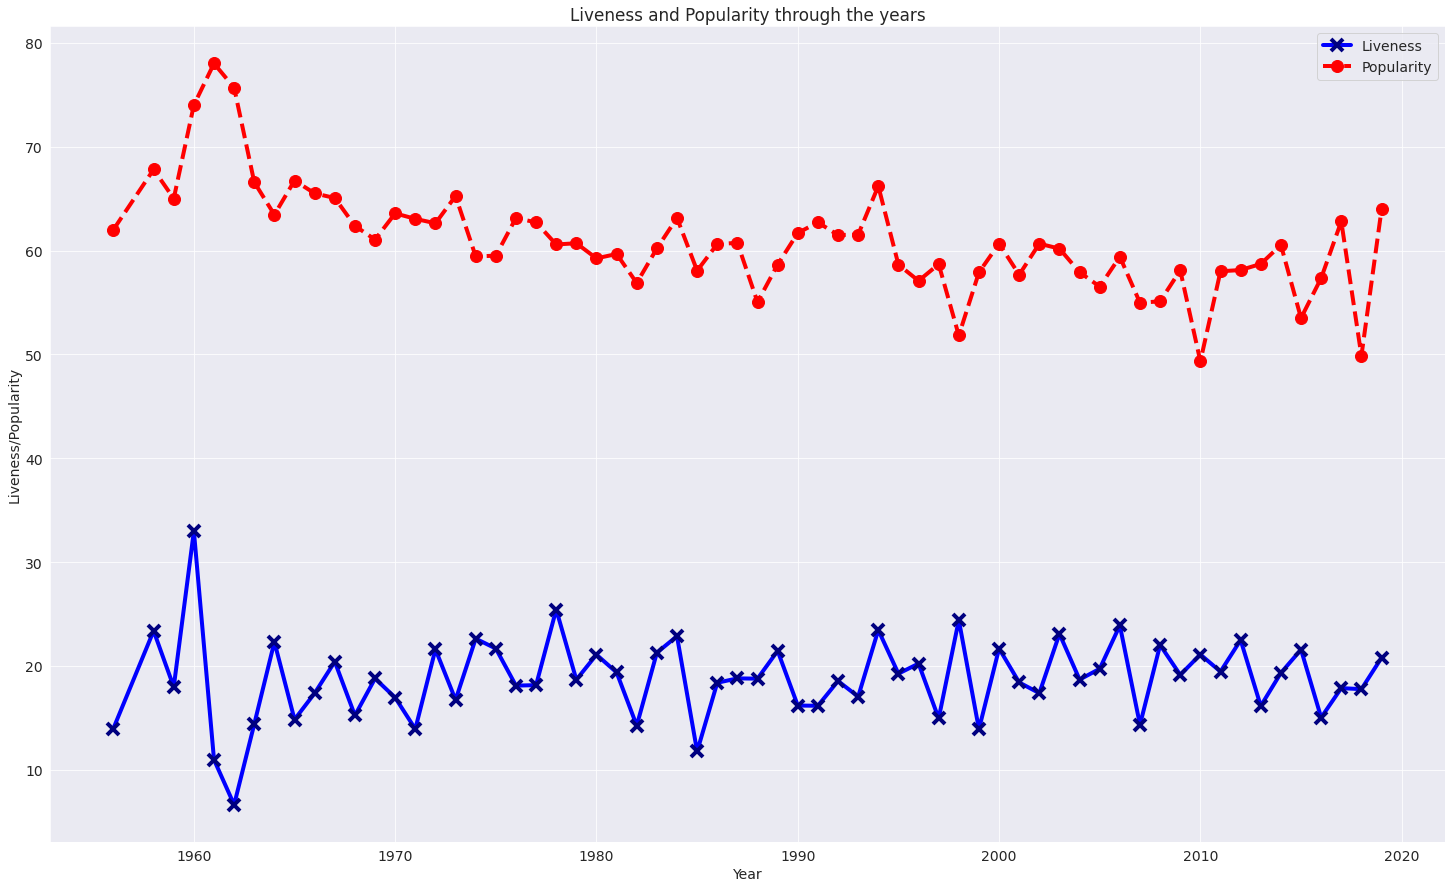

In [45]:
plt.figure(figsize=(25,15))

plt.plot(YearwiseMean.Year, YearwiseMean.Liveness, 'b-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')
plt.plot(YearwiseMean.Year, YearwiseMean.Popularity, 'r--o', linewidth=4, markersize=12,);

plt.title('Liveness and Popularity through the years')

plt.legend(['Liveness', 'Popularity'])

plt.xlabel('Year')
plt.ylabel('Liveness/Popularity')

Let us save and upload our work to Jovian before continuing.

In [46]:
import jovian

In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ch20b024/spotify-top-2000s-mega-dataset-2d59b" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ch20b024/spotify-top-2000s-mega-dataset-2d59b


'https://jovian.ai/ch20b024/spotify-top-2000s-mega-dataset-2d59b'

## Inferences and Conclusion

From the given dataset I got the following conclusions based on my analysis

The Real Slim Shady	song among the top 2000 fall amoung the top danceable songs ( >90),plotted a line graph showing the mean popularity and mean liveliness of different years,Grouped the data by year with the mean of the rest of the given data

In [48]:
import jovian

In [49]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ch20b024/spotify-top-2000s-mega-dataset-2d59b" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ch20b024/spotify-top-2000s-mega-dataset-2d59b


'https://jovian.ai/ch20b024/spotify-top-2000s-mega-dataset-2d59b'

## References and Future Work

I referred the https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas course for doing the data analysis on this dataset. In recent days the most popularly used app is the spotify to listen music. So by doing the analysis on this dataset we can get clarity of what type of songs, artists etc.. are most popular. Based on this analysis we can provide the listeners a good amount of playlists with their requirements. So the uasage of the app also increases.

In [51]:
import jovian

In [52]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ch20b024/spotify-top-2000s-mega-dataset-2d59b" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ch20b024/spotify-top-2000s-mega-dataset-2d59b


'https://jovian.ai/ch20b024/spotify-top-2000s-mega-dataset-2d59b'